# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [3]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [4]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [5]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images


Done extracting features for 2000 / 49000 images


Done extracting features for 3000 / 49000 images


Done extracting features for 4000 / 49000 images


Done extracting features for 5000 / 49000 images


Done extracting features for 6000 / 49000 images


Done extracting features for 7000 / 49000 images


Done extracting features for 8000 / 49000 images


Done extracting features for 9000 / 49000 images


Done extracting features for 10000 / 49000 images


Done extracting features for 11000 / 49000 images


Done extracting features for 12000 / 49000 images


Done extracting features for 13000 / 49000 images


Done extracting features for 14000 / 49000 images


Done extracting features for 15000 / 49000 images


Done extracting features for 16000 / 49000 images


Done extracting features for 17000 / 49000 images


Done extracting features for 18000 / 49000 images


Done extracting features for 19000 / 49000 images


Done extracting features for 20000 / 49000 images


Done extracting features for 21000 / 49000 images


Done extracting features for 22000 / 49000 images


Done extracting features for 23000 / 49000 images


Done extracting features for 24000 / 49000 images


Done extracting features for 25000 / 49000 images


Done extracting features for 26000 / 49000 images


Done extracting features for 27000 / 49000 images


Done extracting features for 28000 / 49000 images


Done extracting features for 29000 / 49000 images


Done extracting features for 30000 / 49000 images


Done extracting features for 31000 / 49000 images


Done extracting features for 32000 / 49000 images


Done extracting features for 33000 / 49000 images


Done extracting features for 34000 / 49000 images


Done extracting features for 35000 / 49000 images


Done extracting features for 36000 / 49000 images


Done extracting features for 37000 / 49000 images


Done extracting features for 38000 / 49000 images


Done extracting features for 39000 / 49000 images


Done extracting features for 40000 / 49000 images


Done extracting features for 41000 / 49000 images


Done extracting features for 42000 / 49000 images


Done extracting features for 43000 / 49000 images


Done extracting features for 44000 / 49000 images


Done extracting features for 45000 / 49000 images


Done extracting features for 46000 / 49000 images


Done extracting features for 47000 / 49000 images


Done extracting features for 48000 / 49000 images


## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [15]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [5e-8]
regularization_strengths = np.arange(1e4, 1e6, 1e4)

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

for lr in learning_rates:
    for reg in regularization_strengths:
        svm_temp = LinearSVM()
        svm_temp.train(X_train_feats, y_train, learning_rate=lr, reg=reg, num_iters=10000, verbose=False)
        train_predict_temp = svm_temp.predict(X_train_feats)
        val_predict_temp = svm_temp.predict(X_val_feats)
        train_accuracy_temp = np.mean(y_train == train_predict_temp)
        val_accuracy_temp = np.mean(y_val == val_predict_temp)
        results[(lr, reg)] = (train_accuracy_temp, val_accuracy_temp)
        if best_val < val_accuracy_temp:
            best_val = val_accuracy_temp
            best_svm = svm_temp

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 5.000000e-08 reg 1.000000e+04 train accuracy: 0.411633 val accuracy: 0.410000
lr 5.000000e-08 reg 2.000000e+04 train accuracy: 0.415735 val accuracy: 0.416000
lr 5.000000e-08 reg 3.000000e+04 train accuracy: 0.416490 val accuracy: 0.420000
lr 5.000000e-08 reg 4.000000e+04 train accuracy: 0.412673 val accuracy: 0.414000
lr 5.000000e-08 reg 5.000000e+04 train accuracy: 0.414714 val accuracy: 0.419000
lr 5.000000e-08 reg 6.000000e+04 train accuracy: 0.415653 val accuracy: 0.419000
lr 5.000000e-08 reg 7.000000e+04 train accuracy: 0.413857 val accuracy: 0.411000
lr 5.000000e-08 reg 8.000000e+04 train accuracy: 0.412980 val accuracy: 0.416000
lr 5.000000e-08 reg 9.000000e+04 train accuracy: 0.415551 val accuracy: 0.417000
lr 5.000000e-08 reg 1.000000e+05 train accuracy: 0.415367 val accuracy: 0.416000
lr 5.000000e-08 reg 1.100000e+05 train accuracy: 0.415388 val accuracy: 0.421000
lr 5.000000e-08 reg 1.200000e+05 train accuracy: 0.414959 val accuracy: 0.411000
lr 5.000000e-08 reg 1.300000

In [16]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.419


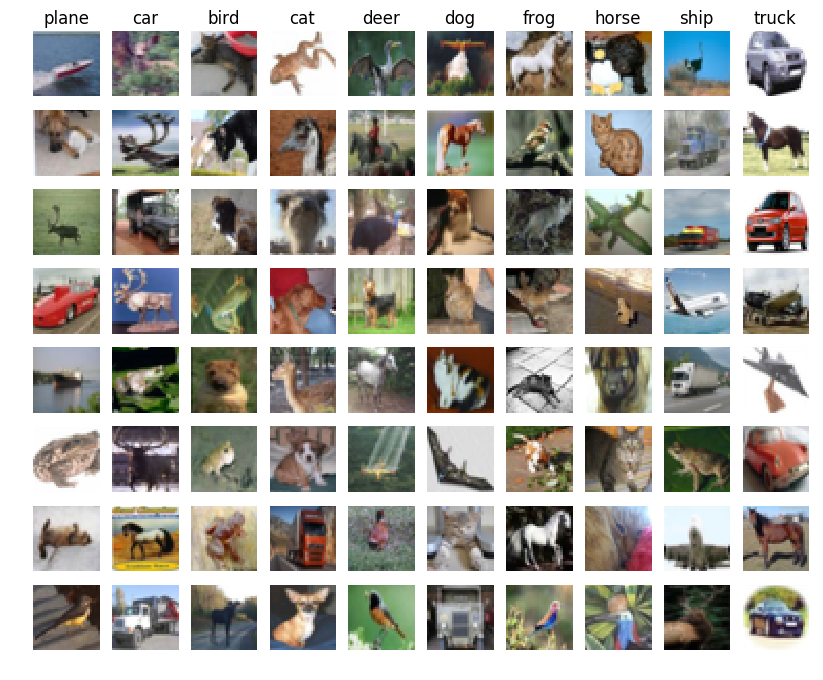

In [17]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
The misclassification results don't make sense and are very strange. Maybe more features that can distinguish images of different classes should be added.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [18]:
print X_train_feats.shape

(49000, 155)


In [37]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = [200, 300, 400]
num_classes = 10
learning_rates = [4e-1]
regularization_strengths = [1e-3, 5e-4, 1e-2]

best_net = None
best_val = -1

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

for lr in learning_rates:
    for reg in regularization_strengths:
        for hs in hidden_dim:
            net_temp = TwoLayerNet(input_dim, hs, num_classes)
            net_temp.train(X_train_feats, y_train, X_val_feats, y_val, num_iters=2000, batch_size=200, learning_rate=lr, learning_rate_decay=0.95, reg=reg, verbose=True)
            train_acc = (net_temp.predict(X_train_feats) == y_train).mean()
            val_acc = (net_temp.predict(X_val_feats) == y_val).mean()
            print 'lr %e reg %e hs %e train accuracy: %f val accuracy: %f' % (lr, reg, hs, train_acc, val_acc)
            if best_val < val_acc:
                best_val = val_acc
                best_net = net_temp

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302585


iteration 100 / 2000: loss 1.642780


iteration 200 / 2000: loss 1.357386


iteration 300 / 2000: loss 1.426802


iteration 400 / 2000: loss 1.318652


iteration 500 / 2000: loss 1.276504


iteration 600 / 2000: loss 1.402222


iteration 700 / 2000: loss 1.384535


iteration 800 / 2000: loss 1.150989


iteration 900 / 2000: loss 1.243954


iteration 1000 / 2000: loss 1.185645


iteration 1100 / 2000: loss 1.208283


iteration 1200 / 2000: loss 1.105690


iteration 1300 / 2000: loss 1.145212


iteration 1400 / 2000: loss 1.036902


iteration 1500 / 2000: loss 1.143193


iteration 1600 / 2000: loss 1.115949


iteration 1700 / 2000: loss 1.089205


iteration 1800 / 2000: loss 1.027918


iteration 1900 / 2000: loss 1.117678


lr 4.000000e-01 reg 1.000000e-03 hs 2.000000e+02 train accuracy: 0.664184 val accuracy: 0.596000
iteration 0 / 2000: loss 2.302586


iteration 100 / 2000: loss 1.651127


iteration 200 / 2000: loss 1.360843


iteration 300 / 2000: loss 1.349264


iteration 400 / 2000: loss 1.273614


iteration 500 / 2000: loss 1.424534


iteration 600 / 2000: loss 1.274228


iteration 700 / 2000: loss 1.207906


iteration 800 / 2000: loss 1.190799


iteration 900 / 2000: loss 1.062717


iteration 1000 / 2000: loss 1.139360


iteration 1100 / 2000: loss 1.117000


iteration 1200 / 2000: loss 1.092129


iteration 1300 / 2000: loss 1.143529


iteration 1400 / 2000: loss 1.182655


iteration 1500 / 2000: loss 1.140889


iteration 1600 / 2000: loss 1.232685


iteration 1700 / 2000: loss 1.101301


iteration 1800 / 2000: loss 1.063938


iteration 1900 / 2000: loss 0.920860


lr 4.000000e-01 reg 1.000000e-03 hs 3.000000e+02 train accuracy: 0.674776 val accuracy: 0.584000
iteration 0 / 2000: loss 2.302586


iteration 100 / 2000: loss 1.621603


iteration 200 / 2000: loss 1.352790


iteration 300 / 2000: loss 1.348090


iteration 400 / 2000: loss 1.385461


iteration 500 / 2000: loss 1.265018


iteration 600 / 2000: loss 1.336479


iteration 700 / 2000: loss 1.287625


iteration 800 / 2000: loss 1.168806


iteration 900 / 2000: loss 1.213996


iteration 1000 / 2000: loss 1.194669


iteration 1100 / 2000: loss 1.141453


iteration 1200 / 2000: loss 1.103396


iteration 1300 / 2000: loss 1.195465


iteration 1400 / 2000: loss 1.141488


iteration 1500 / 2000: loss 1.069904


iteration 1600 / 2000: loss 1.042977


iteration 1700 / 2000: loss 1.154460


iteration 1800 / 2000: loss 1.066263


iteration 1900 / 2000: loss 0.986978


lr 4.000000e-01 reg 1.000000e-03 hs 4.000000e+02 train accuracy: 0.681735 val accuracy: 0.601000
iteration 0 / 2000: loss 2.302585


iteration 100 / 2000: loss 1.575394


iteration 200 / 2000: loss 1.353381


iteration 300 / 2000: loss 1.454294


iteration 400 / 2000: loss 1.417012


iteration 500 / 2000: loss 1.248087


iteration 600 / 2000: loss 1.206545


iteration 700 / 2000: loss 1.269031


iteration 800 / 2000: loss 1.195845


iteration 900 / 2000: loss 1.188650


iteration 1000 / 2000: loss 1.190673


iteration 1100 / 2000: loss 1.039199


iteration 1200 / 2000: loss 1.098045


iteration 1300 / 2000: loss 1.059527


iteration 1400 / 2000: loss 1.106489


iteration 1500 / 2000: loss 1.071349


iteration 1600 / 2000: loss 1.058082


iteration 1700 / 2000: loss 0.974286


iteration 1800 / 2000: loss 1.009024


iteration 1900 / 2000: loss 0.967414


lr 4.000000e-01 reg 5.000000e-04 hs 2.000000e+02 train accuracy: 0.667388 val accuracy: 0.593000
iteration 0 / 2000: loss 2.302585


iteration 100 / 2000: loss 1.679898


iteration 200 / 2000: loss 1.409305


iteration 300 / 2000: loss 1.371841


iteration 400 / 2000: loss 1.295553


iteration 500 / 2000: loss 1.176357


iteration 600 / 2000: loss 1.137555


iteration 700 / 2000: loss 1.216230


iteration 800 / 2000: loss 1.286895


iteration 900 / 2000: loss 1.090034


iteration 1000 / 2000: loss 1.231725


iteration 1100 / 2000: loss 1.131335


iteration 1200 / 2000: loss 1.076186


iteration 1300 / 2000: loss 1.124698


iteration 1400 / 2000: loss 0.965298


iteration 1500 / 2000: loss 1.025871


iteration 1600 / 2000: loss 1.160581


iteration 1700 / 2000: loss 0.992685


iteration 1800 / 2000: loss 1.148102


iteration 1900 / 2000: loss 1.018916


lr 4.000000e-01 reg 5.000000e-04 hs 3.000000e+02 train accuracy: 0.685612 val accuracy: 0.601000
iteration 0 / 2000: loss 2.302585


iteration 100 / 2000: loss 1.626843


iteration 200 / 2000: loss 1.501198


iteration 300 / 2000: loss 1.453787


iteration 400 / 2000: loss 1.202425


iteration 500 / 2000: loss 1.313599


iteration 600 / 2000: loss 1.169781


iteration 700 / 2000: loss 1.109691


iteration 800 / 2000: loss 1.174402


iteration 900 / 2000: loss 1.148364


iteration 1000 / 2000: loss 1.107130


iteration 1100 / 2000: loss 1.144395


iteration 1200 / 2000: loss 1.026872


iteration 1300 / 2000: loss 1.018145


iteration 1400 / 2000: loss 0.955241


iteration 1500 / 2000: loss 1.131944


iteration 1600 / 2000: loss 1.088937


iteration 1700 / 2000: loss 0.919330


iteration 1800 / 2000: loss 0.993442


iteration 1900 / 2000: loss 0.973815


lr 4.000000e-01 reg 5.000000e-04 hs 4.000000e+02 train accuracy: 0.689510 val accuracy: 0.600000
iteration 0 / 2000: loss 2.302587


iteration 100 / 2000: loss 1.730447


iteration 200 / 2000: loss 1.514021


iteration 300 / 2000: loss 1.497289


iteration 400 / 2000: loss 1.566844


iteration 500 / 2000: loss 1.494822


iteration 600 / 2000: loss 1.558394


iteration 700 / 2000: loss 1.561743


iteration 800 / 2000: loss 1.570208


iteration 900 / 2000: loss 1.510189


iteration 1000 / 2000: loss 1.458244


iteration 1100 / 2000: loss 1.497444


iteration 1200 / 2000: loss 1.503614


iteration 1300 / 2000: loss 1.553424


iteration 1400 / 2000: loss 1.338332


iteration 1500 / 2000: loss 1.414121


iteration 1600 / 2000: loss 1.395894


iteration 1700 / 2000: loss 1.400057


iteration 1800 / 2000: loss 1.366838


iteration 1900 / 2000: loss 1.437707


lr 4.000000e-01 reg 1.000000e-02 hs 2.000000e+02 train accuracy: 0.566857 val accuracy: 0.548000
iteration 0 / 2000: loss 2.302587


iteration 100 / 2000: loss 1.697894


iteration 200 / 2000: loss 1.515370


iteration 300 / 2000: loss 1.522524


iteration 400 / 2000: loss 1.552688


iteration 500 / 2000: loss 1.556774


iteration 600 / 2000: loss 1.477672


iteration 700 / 2000: loss 1.591848


iteration 800 / 2000: loss 1.330980


iteration 900 / 2000: loss 1.476073


iteration 1000 / 2000: loss 1.409198


iteration 1100 / 2000: loss 1.360093


iteration 1200 / 2000: loss 1.597438


iteration 1300 / 2000: loss 1.456503


iteration 1400 / 2000: loss 1.391917


iteration 1500 / 2000: loss 1.333727


iteration 1600 / 2000: loss 1.514384


iteration 1700 / 2000: loss 1.424419


iteration 1800 / 2000: loss 1.327208


iteration 1900 / 2000: loss 1.489225


lr 4.000000e-01 reg 1.000000e-02 hs 3.000000e+02 train accuracy: 0.574408 val accuracy: 0.564000
iteration 0 / 2000: loss 2.302588


iteration 100 / 2000: loss 1.638991


iteration 200 / 2000: loss 1.598800


iteration 300 / 2000: loss 1.445687


iteration 400 / 2000: loss 1.565974


iteration 500 / 2000: loss 1.385896


iteration 600 / 2000: loss 1.536884


iteration 700 / 2000: loss 1.440563


iteration 800 / 2000: loss 1.527170


iteration 900 / 2000: loss 1.537635


iteration 1000 / 2000: loss 1.540695


iteration 1100 / 2000: loss 1.403703


iteration 1200 / 2000: loss 1.504857


iteration 1300 / 2000: loss 1.546877


iteration 1400 / 2000: loss 1.517667


iteration 1500 / 2000: loss 1.414379


iteration 1600 / 2000: loss 1.408112


iteration 1700 / 2000: loss 1.370033


iteration 1800 / 2000: loss 1.379600


iteration 1900 / 2000: loss 1.488172


lr 4.000000e-01 reg 1.000000e-02 hs 4.000000e+02 train accuracy: 0.570265 val accuracy: 0.545000


In [38]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print test_acc

0.592


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!